In [36]:
# Importamos las librerias que vamos a utilizar
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# Abrimos el archivo con los datos filtrados
df = pd.read_csv("1 - archivos/df_filtrado.csv", sep=',')

### Exploración de los datos luego de la etapa de limpieza
##### En este etapa, conoceros más a fondo los datos. Se harán algunas representaciones graficas para visualizar con facilidad los resultados encontrados

In [38]:
# Vemos la cantidad de usuarios diferentes que hicieron una búsqueda en el sistema
cantidad_usuarios = df['sessionid'].nunique()
print("La cantidad de usuarios que hicieron una búsqueda en el sistema son:", cantidad_usuarios)

La cantidad de usuarios que hicieron una búsqueda en el sistema son: 853


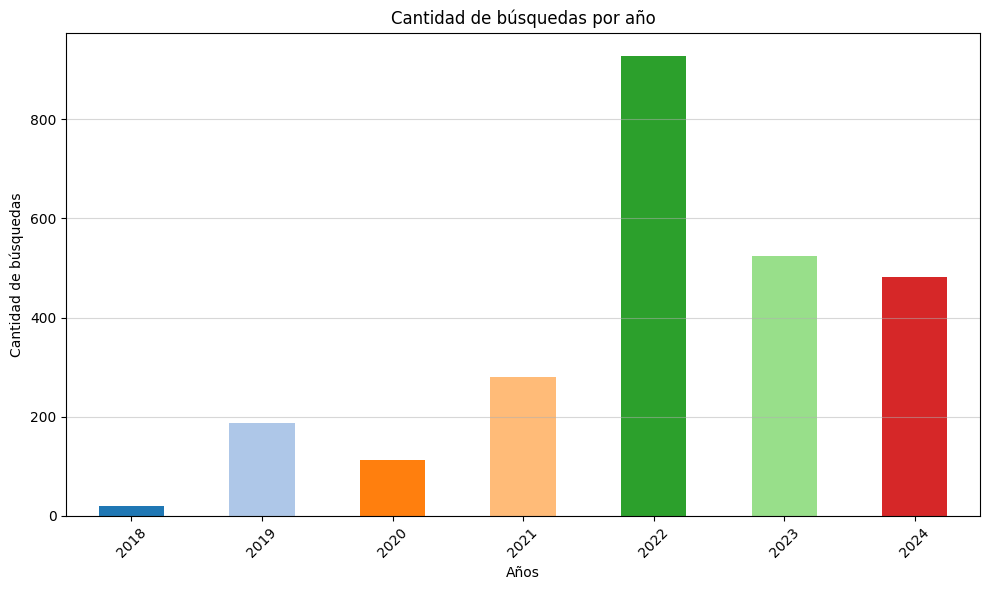

In [39]:
# Pasamos el 'time' de la busqueda a formato tiempo para extraer el año y contabilizarlos
df['time'] = pd.to_datetime(df['time'])
df['año'] = df['time'].dt.year

total_busquedas = df['año'].value_counts().sort_index()

# Grafico para el total de busquedas por año con colores diferentes
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(range(len(total_busquedas)))
total_busquedas.plot(kind='bar', color=colors)
plt.title('Cantidad de búsquedas por año')
plt.xlabel('Años')
plt.ylabel('Cantidad de búsquedas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\Laura\AppData\Local\Temp\ipykernel_10436\1246425830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busquedas_2022['mes'] = busquedas_2022['time'].dt.month


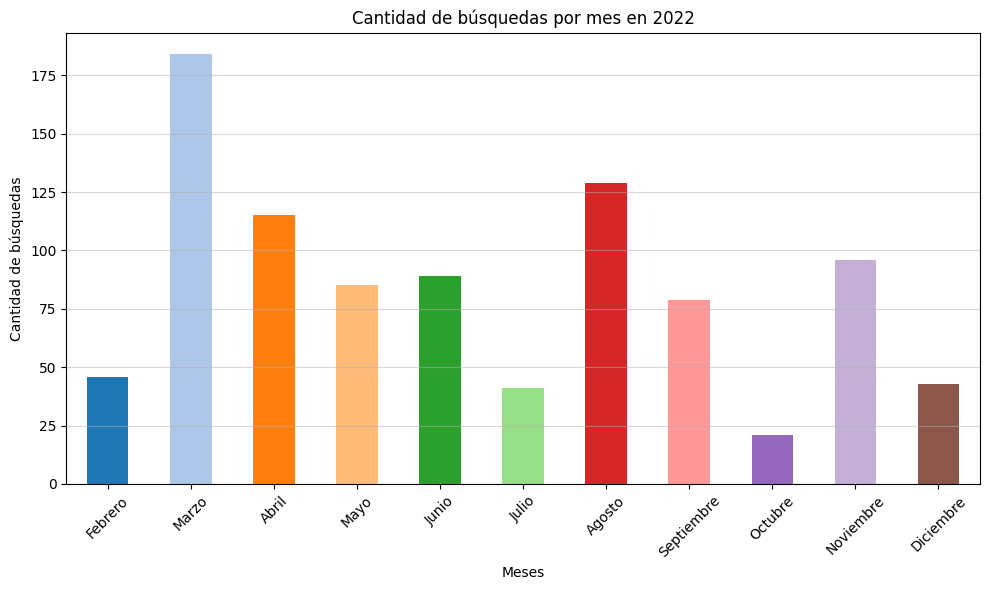

In [40]:
# Filtramos las búsquedas del año 2022
busquedas_2022 = df[df['año'] == 2022]

# Extraemos los meses de las búsquedas
busquedas_2022['mes'] = busquedas_2022['time'].dt.month

# Contabilizamos las búsquedas por mes
total_busquedas_2022 = busquedas_2022['mes'].value_counts().sort_index()

# Asignamos a cada número del mes su respectivo nombre
meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

# Renombramos los índices del total de búsquedas por mes
total_busquedas_2022.index = total_busquedas_2022.index.map(meses)

# Grafico para el total de búsquedas por mes en 2022
plt.figure(figsize=(10, 6))
colors_2022 = plt.cm.tab20(range(len(total_busquedas_2022)))
total_busquedas_2022.plot(kind='bar', color=colors_2022)
plt.title('Cantidad de búsquedas por mes en 2022')
plt.xlabel('Meses')
plt.ylabel('Cantidad de búsquedas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\Laura\AppData\Local\Temp\ipykernel_10436\3915603558.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busquedas_2022['dia'] = busquedas_2022['time'].dt.day


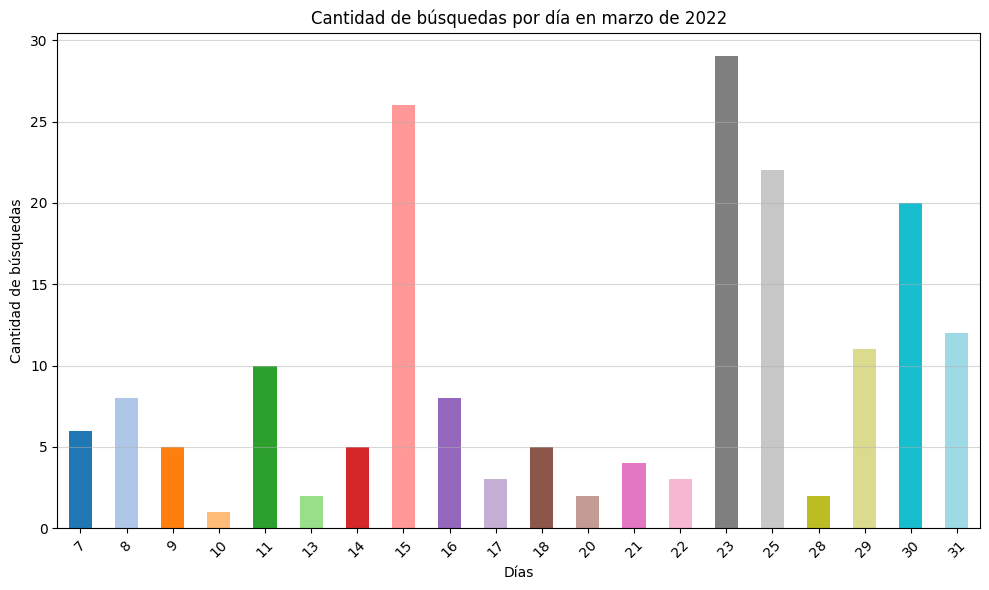

In [41]:
# Aseguramos que la columna 'mes' esté disponible
df['mes'] = df['time'].dt.month

# Filtramos las búsquedas del mes de marzo de 2022
busquedas_2022 = df[(df['año'] == 2022) & (df['mes'] == 3)]

# Extraemos los días de las búsquedas
busquedas_2022['dia'] = busquedas_2022['time'].dt.day

# Contabilizamos las búsquedas por día
total_busquedas_2022 = busquedas_2022['dia'].value_counts().sort_index()

# Grafico para el total de búsquedas por día en marzo de 2022
plt.figure(figsize=(10, 6))
colors_2022 = plt.cm.tab20(range(len(total_busquedas_2022)))
total_busquedas_2022.plot(kind='bar', color=colors_2022)
plt.title('Cantidad de búsquedas por día en marzo de 2022')
plt.xlabel('Días')
plt.ylabel('Cantidad de búsquedas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\Laura\AppData\Local\Temp\ipykernel_10436\1477416510.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busquedas_2023['mes'] = busquedas_2023['time'].dt.month


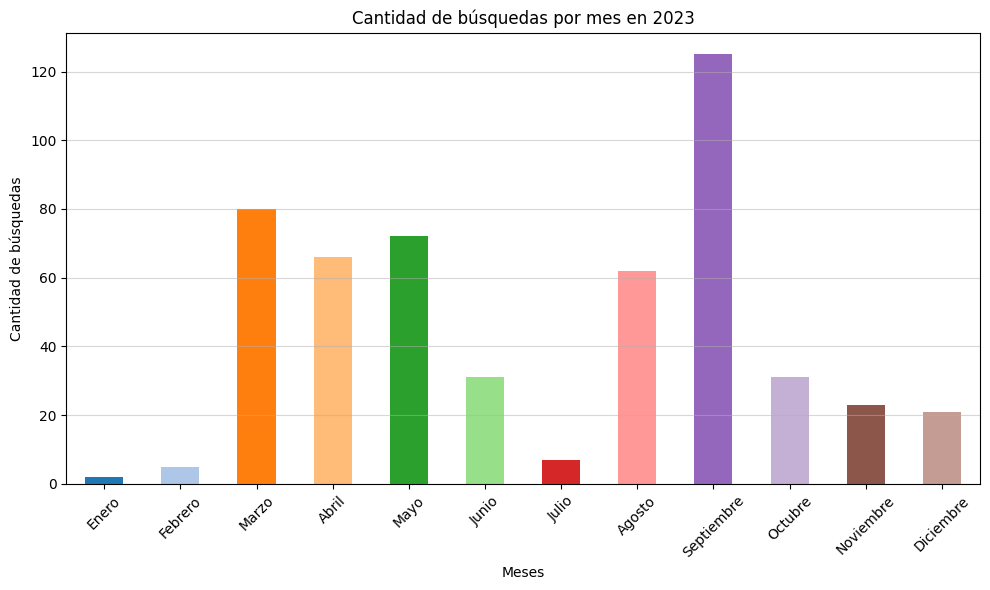

In [42]:
# Filtramos las búsquedas del año 2023
busquedas_2023 = df[df['año'] == 2023]

# Extraemos los meses de las búsquedas
busquedas_2023['mes'] = busquedas_2023['time'].dt.month

# Contabilizamos las búsquedas por mes
total_busquedas_2023 = busquedas_2023['mes'].value_counts().sort_index()

# Renombramos los índices del total de búsquedas por mes
total_busquedas_2023.index = total_busquedas_2023.index.map(meses)

# Grafico para el total de búsquedas por mes en 2022
plt.figure(figsize=(10, 6))
colors_2023 = plt.cm.tab20(range(len(total_busquedas_2023)))
total_busquedas_2023.plot(kind='bar', color=colors_2023)
plt.title('Cantidad de búsquedas por mes en 2023')
plt.xlabel('Meses')
plt.ylabel('Cantidad de búsquedas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

In [43]:
# Buscamos el usuario con más búsquedas dentro del sistema
maximo_usuario_busqueda = df['sessionid'].value_counts()
usuario_con_mas_busquedas = maximo_usuario_busqueda.idxmax()

# Mostramos algunas de sus busquedas en el sistema
print("El usuario con más búsquedas en el sistema es:", usuario_con_mas_busquedas)
df[df['sessionid'] == usuario_con_mas_busquedas].head(5)

El usuario con más búsquedas en el sistema es: e03def7e497ec6c9bb60f290d5247dc8


,sessionid,query_desc,total,time,categorycode,año,mes
1902,e03def7e497ec6c9bb60f290d5247dc8,"BC:1420,",1,2023-09-13 16:46:17,HIST,2023,9
1903,e03def7e497ec6c9bb60f290d5247dc8,"BC:1430,",1,2023-09-13 16:50:23,HIST,2023,9
1904,e03def7e497ec6c9bb60f290d5247dc8,"BC:1431,",1,2023-09-13 16:52:25,HIST,2023,9
1905,e03def7e497ec6c9bb60f290d5247dc8,"BC:1433,",1,2023-09-13 16:53:48,HIST,2023,9
1906,e03def7e497ec6c9bb60f290d5247dc8,"BC:1434,",1,2023-09-13 16:55:30,HIST,2023,9
